In [1]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import sklearn.metrics as sm

In [2]:
dataset = pd.read_csv('wrapper_63.csv')
X= dataset.drop(['label'], axis=1)   # 取出用于建模的特征列X
Y = dataset['label']   # 取出标签列Y

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=420)

In [3]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [4]:
param_grid=[{
            'n_estimators':[i for i in range(40,150,10)],
            'eta':[0.01,0.02,0.04,0.08,0.1,0.2,0.3],
            'max_depth':[2,3,4,5,6,7,8],
             'gamma':[0,0.1,1.0,2.0,3.0],
            },
           ]

In [5]:
boost = xgb.XGBClassifier(random_state = 420)

In [6]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(boost, param_grid, n_jobs = -1, verbose = 1, cv=5)     
grid_search.fit(X_train, Y_train)   
boost = grid_search.best_estimator_ 
grid_search.best_params_ 

Fitting 5 folds for each of 2695 candidates, totalling 13475 fits


{'eta': 0.08, 'gamma': 0.1, 'max_depth': 4, 'n_estimators': 60}

In [7]:
boost.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.08,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.0799999982, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=60, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=420, ...)

In [8]:
y_pred = boost.predict(X_test)
cp = sm.classification_report(Y_test, y_pred)
print("---------------分类报告\n", cp)

---------------分类报告
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       100
           1       0.78      0.76      0.77        33
           2       0.75      0.77      0.76        53
           3       0.86      0.69      0.76        54

    accuracy                           0.80       240
   macro avg       0.80      0.78      0.79       240
weighted avg       0.81      0.80      0.80       240



In [9]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score,roc_curve, auc 

print('Accuracy score:', accuracy_score(Y_test, y_pred))
print('Recall:', recall_score(Y_test, y_pred, average='weighted'))
print('F1-score:', f1_score(Y_test, y_pred, average='weighted'))
print('Precision score:', precision_score(Y_test, y_pred, average='weighted'))

# y_test_proba_rfc = boost.predict_proba(X_test)
# false_positive_rate_rfc, recall_rfc, thresholds_rfc = roc_curve(Y_test, y_test_proba_rfc[:, 1])  
# roc_auc_rfc = auc(false_positive_rate_rfc, recall_rfc)   
# print("---------------AUC\n", cp)
# print(roc_auc_rfc )

Accuracy score: 0.8041666666666667
Recall: 0.8041666666666667
F1-score: 0.8022313255345902
Precision score: 0.8065568291930938


In [10]:
param_grid=[{
             'min_child_weight':[i for i in range(1,15,1)],
             'max_delta_step':[i for i in range(1,15,1)],

            },
           ]

In [11]:
boost = xgb.XGBClassifier(eta=0.008,gamma=0.1,max_depth=4, n_estimators=60,random_state = 420)

In [12]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(boost, param_grid, n_jobs = -1, verbose = 1, cv=5)     
grid_search.fit(X_train, Y_train)   
boost = grid_search.best_estimator_ 
grid_search.best_params_ 

Fitting 5 folds for each of 196 candidates, totalling 980 fits


{'max_delta_step': 2, 'min_child_weight': 9}

In [13]:
boost.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.008,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.00800000038, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=2, max_depth=4, max_leaves=0, min_child_weight=9,
              missing=nan, monotone_constraints='()', n_estimators=60, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=420, ...)

In [14]:
y_pred = boost.predict(X_test)
from sklearn.metrics import confusion_matrix
cp = sm.classification_report(Y_test, y_pred)
print("---------------分类报告\n", cp)

---------------分类报告
               precision    recall  f1-score   support

           0       0.83      0.90      0.87       100
           1       0.74      0.76      0.75        33
           2       0.79      0.77      0.78        53
           3       0.89      0.76      0.82        54

    accuracy                           0.82       240
   macro avg       0.81      0.80      0.80       240
weighted avg       0.82      0.82      0.82       240



In [15]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score,roc_curve, auc 

print('Accuracy score:', accuracy_score(Y_test, y_pred))
print('Recall:', recall_score(Y_test, y_pred, average='weighted'))
print('F1-score:', f1_score(Y_test, y_pred, average='weighted'))
print('Precision score:', precision_score(Y_test, y_pred, average='weighted'))



# y_test_proba_rfc = boost.predict_proba(X_test)
# false_positive_rate_rfc, recall_rfc, thresholds_rfc = roc_curve(Y_test, y_test_proba_rfc[:, 1])  
# roc_auc_rfc = auc(false_positive_rate_rfc, recall_rfc)   
# print("---------------AUC\n", cp)
# print(roc_auc_rfc )

Accuracy score: 0.8208333333333333
Recall: 0.8208333333333333
F1-score: 0.8201491808357481
Precision score: 0.8229872314031521


In [16]:
param_grid=[{
            'subsample':[0.1,0.2,0.4,0.6,0.8,1.0], 
            'reg_alpha':[i for i in range(1,50,2)], 
            },
           ]

In [16]:
boost = xgb.XGBClassifier(eta=0.008,gamma=0.1,max_depth=4, n_estimators=60, max_delta_step=2,min_child_weight=9,random_state = 420)

In [17]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(boost, param_grid, n_jobs = -1, verbose = 1, cv=5)     
grid_search.fit(X_train, Y_train)   
boost = grid_search.best_estimator_ 
grid_search.best_params_ 

Fitting 5 folds for each of 196 candidates, totalling 980 fits


{'max_delta_step': 2, 'min_child_weight': 9}

In [18]:
boost.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.008,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.00800000038, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=2, max_depth=4, max_leaves=0, min_child_weight=9,
              missing=nan, monotone_constraints='()', n_estimators=60, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=420, ...)

In [19]:
y_pred = boost.predict(X_test)
cp = sm.classification_report(Y_test, y_pred)
print("---------------分类报告\n", cp)

---------------分类报告
               precision    recall  f1-score   support

           0       0.83      0.90      0.87       100
           1       0.74      0.76      0.75        33
           2       0.79      0.77      0.78        53
           3       0.89      0.76      0.82        54

    accuracy                           0.82       240
   macro avg       0.81      0.80      0.80       240
weighted avg       0.82      0.82      0.82       240



In [20]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score,roc_curve, auc 

print('Accuracy score:', accuracy_score(Y_test, y_pred))
print('Recall:', recall_score(Y_test, y_pred, average='weighted'))
print('F1-score:', f1_score(Y_test, y_pred, average='weighted'))
print('Precision score:', precision_score(Y_test, y_pred, average='weighted'))

# y_test_proba_rfc = boost.predict_proba(X_test)
# false_positive_rate_rfc, recall_rfc, thresholds_rfc = roc_curve(Y_test, y_test_proba_rfc[:, 1])  
# roc_auc_rfc = auc(false_positive_rate_rfc, recall_rfc)   
# print("---------------AUC\n", cp)
# print(roc_auc_rfc )

Accuracy score: 0.8208333333333333
Recall: 0.8208333333333333
F1-score: 0.8201491808357481
Precision score: 0.8229872314031521


In [23]:
boost = xgb.XGBClassifier(eta=0.04,gamma=2,max_depth=6, n_estimators=80, max_delta_step=1,min_child_weight=12,reg_alpha=1, subsample=0.1,random_state = 420)
boost.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.04, eval_metric=None,
              feature_types=None, gamma=2, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=1, max_depth=6,
              max_leaves=None, min_child_weight=7, missing=nan,
              monotone_constraints=None, n_estimators=80, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [24]:
y_pred = boost.predict(X_test)
cp = sm.classification_report(Y_test, y_pred)
print("---------------分类报告\n", cp)

---------------分类报告
               precision    recall  f1-score   support

           0       0.69      1.00      0.82        52
           1       0.00      0.00      0.00        23

    accuracy                           0.69        75
   macro avg       0.35      0.50      0.41        75
weighted avg       0.48      0.69      0.57        75



E:\Anaconda1\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda1\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda1\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:


from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score,roc_curve, auc 
from sklearn.model_selection import cross_val_score
print('Accuracy score:', accuracy_score(Y_test, y_pred))
print('Recall:', recall_score(Y_test, y_pred, average='weighted'))
print('F1-score:', f1_score(Y_test, y_pred, average='weighted'))
print('Precision score:', precision_score(Y_test, y_pred, average='weighted'))

y_test_proba_rfc = boost.predict_proba(X_test)
false_positive_rate_rfc, recall_rfc, thresholds_rfc = roc_curve(Y_test, y_test_proba_rfc[:, 1])  
roc_auc_rfc = auc(false_positive_rate_rfc, recall_rfc)   
print("---------------AUC\n", cp)
print(roc_auc_rfc )

print("..................................")
scores1 = cross_val_score(boost, X_train, Y_train, cv = 5, scoring = 'accuracy')
scores2 = cross_val_score(boost, X_test, Y_test, cv = 5, scoring = 'accuracy')
# 输出5次交叉验证的准确率
print('Train Accuracy score:',scores1)
print('Test Accuracy score:',scores2)

Accuracy score: 0.6933333333333334
Recall: 0.6933333333333334
F1-score: 0.5677690288713911
Precision score: 0.48071111111111114
---------------AUC
               precision    recall  f1-score   support

           0       0.69      1.00      0.82        52
           1       0.00      0.00      0.00        23

    accuracy                           0.69        75
   macro avg       0.35      0.50      0.41        75
weighted avg       0.48      0.69      0.57        75

0.5
..................................


E:\Anaconda1\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Accuracy score: [0.71666667 0.71666667 0.71666667 0.71666667 0.7       ]
Test Accuracy score: [0.66666667 0.66666667 0.66666667 0.73333333 0.73333333]


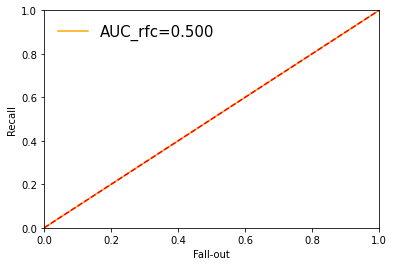

In [23]:
# 画图 画出模型的ROC曲线
plt.plot(false_positive_rate_rfc, recall_rfc, color='orange', label='AUC_rfc=%0.3f' % roc_auc_rfc)  
plt.legend(loc='best', fontsize=15, frameon=False)  
plt.plot([0, 1], [0, 1], 'r--')  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.0])  
plt.ylabel('Recall')  
plt.xlabel('Fall-out')  
plt.show()

In [25]:
empty = np.array([[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]])
n=1
while n < 51:
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = n)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    boost= xgb.XGBClassifier(eta=0.01,gamma=0,max_depth=3, n_estimators=60, max_delta_step=1,min_child_weight=8,random_state = 420)
    boost.fit(X_train, Y_train)
    
    y_pred = boost.predict(X_test)   
    y_updatapred = boost.predict(X_train)
    from sklearn.metrics import confusion_matrix, roc_auc_score
    cm = confusion_matrix(Y_test, y_pred)   
    cm_updata = confusion_matrix(Y_train, y_updatapred)
    auc = roc_auc_score(Y_test, y_pred)
    auc_updata = roc_auc_score(Y_train, y_updatapred)
    a = cm[0,0]
    b = cm[0,1]
    c = cm[1,0]
    d = cm[1,1]
    sen = d/(d+c)
    sep = a/(a+b)
    acc = (a+d)/(a+b+c+d)
    pre = a/(a+c)
    F1 = (2*a)/(2*a+c+b)
    
    a_updata = cm_updata[0,0]
    b_updata = cm_updata[0,1]
    c_updata = cm_updata[1,0]
    d_updata = cm_updata[1,1]
    
    sen_updata = d_updata/(d_updata + c_updata)
    sep_updata = a_updata/(a_updata + b_updata)
    acc_updata = (a_updata+d_updata)/(a_updata+b_updata+c_updata+d_updata)
    pre_updata = a_updata/(a_updata + c_updata)
    F1_updata = (2*a_updata)/(2*a_updata+c_updata+b_updata)
    
    first = np.array([[n],[sen],[sep],[acc],[pre],[F1],[auc],[sen_updata],[sep_updata],[acc_updata],[pre_updata],[F1_updata],[auc_updata]])
    second = np.hstack((empty,first))
    empty = second
    empty = second
    n = n + 1
    print(n)
final_par = np.delete(second,0,axis=1)
print (final_par)
final_parT = final_par.T
np.savetxt('XGboost_Cocr',final_parT,delimiter=',')

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
[[1.00000000e+00 2.00000000e+00 3.00000000e+00 4.00000000e+00
  5.00000000e+00 6.00000000e+00 7.00000000e+00 8.00000000e+00
  9.00000000e+00 1.00000000e+01 1.10000000e+01 1.20000000e+01
  1.30000000e+01 1.40000000e+01 1.50000000e+01 1.60000000e+01
  1.70000000e+01 1.80000000e+01 1.90000000e+01 2.00000000e+01
  2.10000000e+01 2.20000000e+01 2.30000000e+01 2.40000000e+01
  2.50000000e+01 2.60000000e+01 2.70000000e+01 2.80000000e+01
  2.90000000e+01 3.00000000e+01 3.10000000e+01 3.20000000e+01
  3.30000000e+01 3.40000000e+01 3.50000000e+01 3.60000000e+01
  3.70000000e+01 3.80000000e+01 3.90000000e+01 4.00000000e+01
  4.10000000e+01 4.20000000e+01 4.30000000e+01 4.40000000e+01
  4.50000000e+01 4.60000000e+01 4.70000000e+01 4.80000000e+01
  4.90000000e+01 5.00000000e+01]
 [0.00000000e+00 1.30434783e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.